## Подготовка к работе

In [1]:
#Импорт библилиотек
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
# Подготавливаем общие настройки для графиков

sns.set(
    rc={
        "figure.figsize": (20, 10), #размер графика - 12 дюймов в ширину, 8 в длину
        "axes.titlesize": 20, #размер заголовка 
        "axes.labelsize": 14, #размер подписей осей
        "xtick.labelsize": 13, #размер подписей чёрточек на x-оси
        "ytick.labelsize": 13, #размер подписей чёрточек на y-оси
    }
)

sns.set_style("whitegrid") #тема фона, белая со штриховкой

In [3]:
os.listdir(os.getcwd())

['avocado_mean.csv',
 'ads',
 '.DS_Store',
 'avocado_full.csv',
 'delays.csv',
 'les_6_hw_1.ipynb',
 '.ipynb_checkpoints',
 'les_6_hw_2.ipynb']

In [4]:
avocado_mean = pd.read_csv('avocado_mean.csv')

In [5]:
avocado_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          169 non-null    object 
 1   AveragePrice  169 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [6]:
pd.to_datetime(avocado_mean.Date)

0     2015-01-04
1     2015-01-11
2     2015-01-18
3     2015-01-25
4     2015-02-01
         ...    
164   2018-02-25
165   2018-03-04
166   2018-03-11
167   2018-03-18
168   2018-03-25
Name: Date, Length: 169, dtype: datetime64[ns]

In [7]:
avocado_mean.rolling(3).mean().round(2).max()

AveragePrice    1.85
dtype: float64

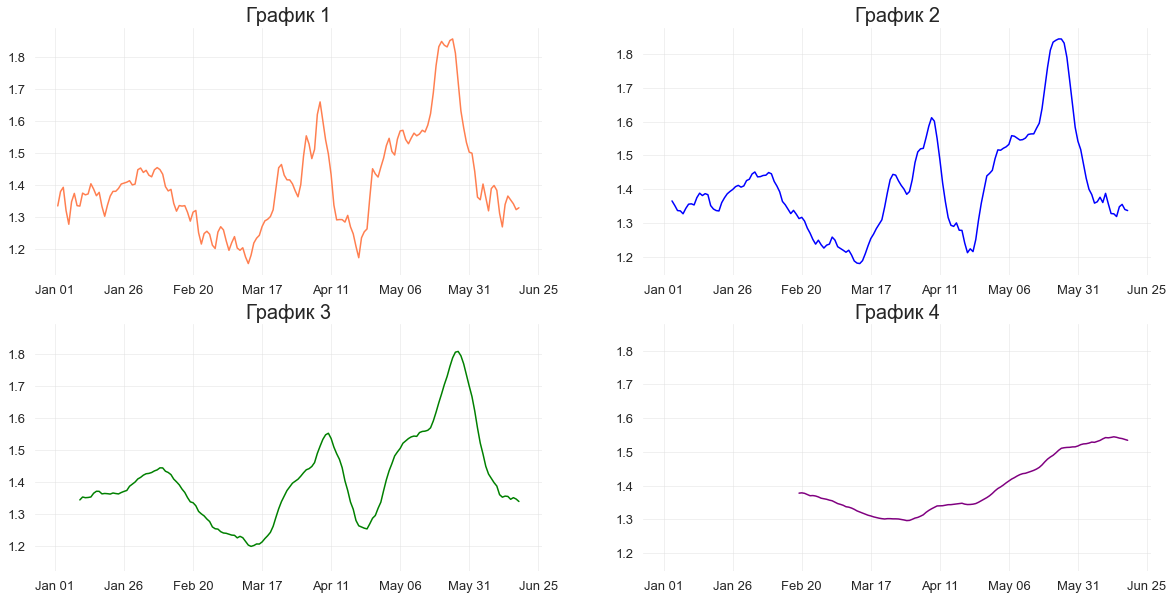

In [8]:
import matplotlib.dates as mdates

windows = [2,4,10,50]
colors = ['coral', 'blue', 'green', 'purple']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)

for window, ax, color in zip(windows, axes.flatten(), colors): 
    ax.plot(avocado_mean.rolling(window = window).mean(), label = window, color = color)
for ax in axes.flatten():
    # удаляем рамку
    ax.set_frame_on(False)  
    # устанавливаем major locator – 4 января для каждого года
    #ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth = 1, bymonthday = 4))  
    # показывать в формате сокращенного названия месяца и дня (Jan 04)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    # под major locator - minor locator, т.е. редактируем minor ticks
    ax.xaxis.set_minor_locator(mdates.YearLocator(month=1, day=1))
    # показываем год
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
    # делаем сетку графика совсем немного серой и наполовину прозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)
for name, ax in zip(['1','2','3','4'], axes.flatten()):
    ax.set(title='График {}'.format(name))
    ax.tick_params(labelbottom=True, which='both')
plt.show()

In [9]:
avocado_ewm = avocado_mean.ewm(span = 2).mean()

In [10]:
os.listdir(os.getcwd())

['avocado_mean.csv',
 'ads',
 '.DS_Store',
 'avocado_full.csv',
 'delays.csv',
 'les_6_hw_1.ipynb',
 '.ipynb_checkpoints',
 'les_6_hw_2.ipynb']

In [11]:
avocado_full = pd.read_csv('avocado_full.csv', index_col=0, )

In [12]:
avocado_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 2015-01-04 to 2018-03-25
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [13]:
list(avocado_full)

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [14]:
avocado_full.region.unique()[1]

'Chicago'

In [15]:
avocado_full.type.unique()[0]

'organic'

In [16]:
chi_orgavocado = avocado_full.query('type in "organic" and region in "Chicago"')

In [17]:
chi_orgavocado['AveragePrice'].rolling(4).mean()['2016-08-21'].round(4)

2.1025

In [18]:
chi_orgavocado['AveragePrice'].ewm(span=4).mean()['2016-08-21'].round(4)

2.0624

In [19]:
chi_orgavocado['AveragePrice'].rolling(4).mean()['2017-02-19'].round(4)

1.5325

In [20]:
chi_orgavocado['AveragePrice'].ewm(span=4).mean()['2017-02-19'].round(4)

1.5618

In [21]:
avocado_full['roling'] = avocado_full['AveragePrice'].rolling(100).mean()

In [22]:
avocado_full = avocado_full.reset_index()

In [23]:
avocado_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  roling        18150 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.9+ MB


In [24]:
pd.to_datetime(avocado_full['Date'])

0       2015-01-04
1       2015-01-04
2       2015-01-04
3       2015-01-04
4       2015-01-04
           ...    
18244   2018-03-25
18245   2018-03-25
18246   2018-03-25
18247   2018-03-25
18248   2018-03-25
Name: Date, Length: 18249, dtype: datetime64[ns]

In [25]:
avocado_full.year.unique()

array([2015, 2016, 2017, 2018])

In [33]:
fig = px.line(avocado_full.query('year == 2018'), y = 'roling', x = 'Date', height=600)
fig.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 20), sharey='col', sharex=True)
axes[0].plot(chi_orgavocado['AveragePrice'].rolling(4).mean()['2015-07-01': '2016-12-30'], color = 'coral')
axes[1].plot(chi_orgavocado['AveragePrice'].ewm(span=4).mean()['2015-07-01': '2016-12-30'], color = 'purple')
for ax in axes.flatten():
    # удаляем рамку
    ax.set_frame_on(False)  
    # делаем сетку графика совсем немного серой и наполовину прозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)
     # показывать в формате сокращенного названия месяца и дня (Jan 04)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    # под major locator - minor locator, т.е. редактируем minor ticks
    ax.xaxis.set_minor_locator(mdates.YearLocator(month=1, day=1))
    # показываем год
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
    ax.set_xticklabels(labels=chi_orgavocado.index, rotation=90)
for name, ax in zip(['Средне взвешенное','Экспоненциарное сглаживание'], axes.flatten()):
    ax.set(title='График: {}'.format(name))
    ax.tick_params(labelbottom=True, which='both')
fig.tight_layout()
plt.show()

In [ ]:
os.listdir(os.getcwd())

In [ ]:
dalays = pd.read_csv('delays.csv')

In [ ]:
dalays.dtypes

In [ ]:
dalays

In [ ]:
dalays.delay = dalays.delay.str.replace('-','')

In [ ]:
dalays

In [ ]:
dalays.delay = pd.to_timedelta(dalays.delay)

In [ ]:
dalays['delay_categorical'] = pd.cut(dalays.delay, bins = 3)

In [ ]:
dalays.dtypes

In [ ]:
dalays

In [ ]:
dalays.delay.max()

In [ ]:
dalays['delay_categorical'] = pd.cut(dalays.delay, bins = pd.to_timedelta(['0d','1d','2d', '3d','5d']),\
                                     labels=['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days'])

In [ ]:
dalays

In [ ]:
dalays_categorical = dalays.groupby('delay_categorical').agg({'client_id' : 'count'})\
.reset_index()\
.sort_values('client_id', ascending=False)

In [ ]:
fig = px.bar(dalays_categorical, x = "delay_categorical", y = "client_id",\
             color="client_id",\
             height=500)
fig.show()